# Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering is a technique for grouping a set of data points into a hierarchy of clusters. The algorithm starts by treating each data point as an individual cluster and iteratively merges the closest clusters until a single cluster remains. The linkage function defines the distance between clusters, and there are various linkage methods, such as single linkage, complete linkage, average linkage, and Ward's method.

## Mathematical Representation

Let $D$ be the distance matrix, where $D_{ij}$ represents the distance between data points $i$ and $j$. Initially, each data point is its own cluster, and the clustering process involves merging clusters $C_i$ and $C_j$ with a specified linkage function:

### Initialization

- $C_i = \{i\}$ for all $i$.
- $D_{ij} =$ distance between data points $i$ and $j$.

### Merge

- Find the pair of clusters $C_i$ and $C_j$ with the minimum distance according to the chosen linkage method.
- Merge $C_i$ and $C_j$ into a new cluster $C_{ij} = C_i \cup C_j$.
- Update the distance matrix $D$ to reflect the distances between the new cluster $C_{ij}$ and the remaining clusters.

### Repeat

- Repeat the merging step until only a single cluster remains.

### Dendrogram

- Construct a dendrogram to visualize the hierarchy of clusters.

# Agglomerative Hierarchical Clustering Example

## Example Data:
Let's consider a small dataset with three points in a 2D space:

$$X = \{(2, 3), (5, 8), (1, 1)\}$$

## Algorithm Steps:

### Step 1: Initialization

- Treat each data point as an individual cluster.
- Compute the distance matrix.

$$
\begin{array}{|c|c|c|}
\hline
   & (2, 3) & (5, 8) & (1, 1) \\
   \hline
(2, 3) & 0 & & \\
\hline
(5, 8) & & 0 & \\
\hline
(1, 1) & & & 0 \\
\hline
\end{array}
$$

### Step 2: Merge

- Find the closest clusters and merge them.

In this example, the closest clusters are (2, 3) and (1, 1). Merge them into a new cluster:

New Cluster: $(2, 3) \cup (1, 1) = \{(2, 3), (1, 1)\}$

Update the distance matrix:

$$
\begin{array}{|c|c|}
\hline
   & \{(2, 3) \cup (1, 1)\} & (5, 8) \\
\hline
\{(2, 3) \cup (1, 1)\} & 0 & \\
\hline
(5, 8) & & 0 \\
\hline
\end{array}
$$


### Step 3: Repeat

- Repeat the process until only one cluster remains.

In the next iteration, the closest clusters are $(2, 3) \cup (1, 1)$ and (5, 8). Merge them into a new cluster:

New Cluster: $\{(2, 3), (1, 1), (5, 8)\}$

Update the distance matrix:

$$
\begin{array}{|c|}
\{(2, 3), (1, 1), (5, 8)\} \\
\end{array}
$$

### Step 4: Dendrogram

- Construct a dendrogram to visualize the hierarchy of clusters.

The dendrogram shows the merging process and the distances at which clusters were merged.


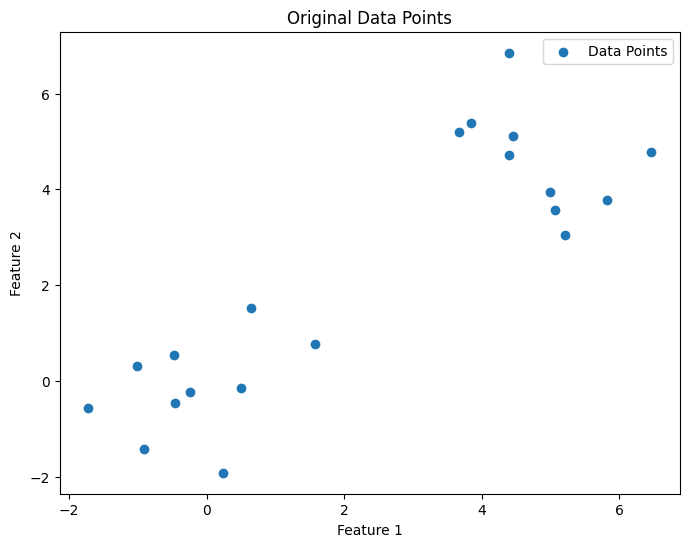

<ipython-input-184-88bbdadf6b0b>:26: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [ ]:
import numpy as np
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Generate a synthetic dataset with two clusters
np.random.seed(42)
cluster1 = np.random.randn(10, 2)
cluster2 = np.random.randn(10, 2) + np.array([5, 5])

X = np.vstack([cluster1, cluster2])

# Plot the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Data Points')
plt.title('Original Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Calculate pairwise distances
distances = np.linalg.norm(X[:, None] - X, axis=-1)

# Create linkage matrix using Ward's method
Z = linkage(distances, method='ward')

# Create an interactive dendrogram with Plotly
dendrogram = ff.create_dendrogram(Z, orientation='bottom')
dendrogram.update_layout(width=800, height=600)
dendrogram.show()

# # Alternatively, you can also use Matplotlib for visualization
# plt.figure(figsize=(12, 8))
# dendrogram(Z, orientation='top', labels=list(range(1, len(X) + 1)))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.show()



# Advantages

1. **Hierarchy Representation:**
   - Agglomerative Hierarchical Clustering provides a hierarchical structure, allowing users to visualize relationships and similarities among data points at different levels. This facilitates a more nuanced understanding of data structure.

2. **No Fixed Number of Clusters:**
   - Unlike some clustering algorithms, agglomerative hierarchical clustering does not require specifying the number of clusters in advance. This flexibility is beneficial when the optimal number of clusters is unknown.

3. **Flexibility in Linkage Methods:**
   - Users can choose from various linkage methods (e.g., single, complete, average linkage), offering customization based on data characteristics and desired cluster properties.

4. **Interpretability:**
   - The hierarchical structure provides an interpretable representation of relationships between data points, aiding in understanding data structure and making informed decisions.

5. **Incremental Clustering:**
   - Well-suited for incremental clustering, allowing new data points to be added to an existing clustering structure. This adaptability is valuable in scenarios with continuously updated data.

6. **Merge and Split Capability:**
   - Agglomerative clustering supports both merging and splitting of clusters at different hierarchy levels, accommodating various cluster shapes and sizes.

7. **Distance Metric Choice:**
   - Users can choose from a variety of distance metrics based on their data characteristics, making agglomerative hierarchical clustering applicable to different data types.

8. **Noise Handling:**
   - Robust to noise and outliers, as they can be effectively handled during the merging process. This makes it suitable for datasets containing some level of noise.

# Limitations:

1. **Computational Complexity:**
   - Agglomerative hierarchical clustering can become computationally expensive, especially for large datasets. The time complexity is O(n^3), making it less efficient for big data scenarios.

2. **Scalability Concerns:**
   - The method may not scale well to large datasets due to its quadratic or cubic time complexity. This can limit its applicability in scenarios with a vast number of data points.

3. **Sensitive to Outliers:**
   - Agglomerative clustering is sensitive to outliers, as they can significantly impact the merging process. Outliers might lead to the formation of suboptimal clusters.

4. **Difficulty in Handling Noise:**
   - While robust to some noise, agglomerative clustering may struggle with high levels of noise, affecting the quality of the resulting clusters.

5. **Subjectivity in Dendrogram Cutting:**
   - Determining the optimal number of clusters involves cutting the dendrogram at a certain height. This process is subjective and may lead to different interpretations and clusterings.

6. **Inability to Undo Merges:**
   - Once clusters are merged, it is not possible to undo the merging process in agglomerative hierarchical clustering. This lack of reversibility can limit its flexibility in certain applications.

7. **Memory Requirements:**
   - The memory requirements can be substantial, especially when dealing with large datasets or deep hierarchies. This may pose challenges for systems with limited memory.

8. **Dependence on Distance Metric:**
   - The performance of agglomerative clustering is influenced by the choice of distance metric. Different metrics may lead to different cluster structures, and selecting an appropriate metric is crucial.

9. **Difficulty with Irregular Cluster Shapes:**
   - Agglomerative hierarchical clustering may struggle with datasets containing irregularly shaped clusters, as the method tends to form spherical or convex clusters.

10. **Limited to Euclidean Spaces:**
    - The algorithm is more naturally suited for data in Euclidean spaces, and its performance may degrade when dealing with non-Euclidean or high-dimensional data.

